In [8]:
import pandas as pd

# 파일 경로를 지정합니다.
file_path_productInfo = '/content/product_info.csv'
file_path_reviews = '/content/all_reviews1.csv'

try:
    # CSV 파일을 pandas DataFrame으로 읽어옵니다.
    df_productInfo = pd.read_csv(file_path_productInfo)
    df_reviews = pd.read_csv(file_path_reviews)

    # DataFrame을 출력합니다.
    print(df_productInfo.head(20))
    print(df_reviews.head(20))

except Exception as e:
    # 예외가 발생한 경우 에러 메시지를 출력합니다.
    print(f"An error occurred: {e}")

    product_code       distributor                product_name  price
0     1000572062               사리원                     소불고기 전골  11925
1     1000773213             어반다이닝                  바지락 술찜 파스타  11449
2     1000832433          최현석의 쵸이닷          파스타 인기 메뉴 11종 (택1)   6715
3     1000040783               바른식                강릉식 짬뽕순두부 찌개   8900
4        5062362              하루한킷                    송탄식 부대찌개  14500
5     1000330580          해운대암소갈비집                  한우 소불고기 전골  14310
6        5099160        LITTLENECK                 리틀넥 스테이크 키트  19900
7     1000016600               투다리             시그니처 김치우동 (2인분)  13400
8     1000944714         정지선의 티엔미미         티엔미미 인기 면요리 4종 (택1)   5925
9        5049405  My little recipe         안동에서 올라온 전통찜닭 (2인용)  16182
10    1000872222               투다리         인기 밀키트 4종 골라담기 (택1)  12990
11    1000835959          쵸이닷:직원食당                   이태원식 부대찌개  11250
12    1000811962              일상식탁                  부산식 얼큰 낙곱새  17520
13       5053932    

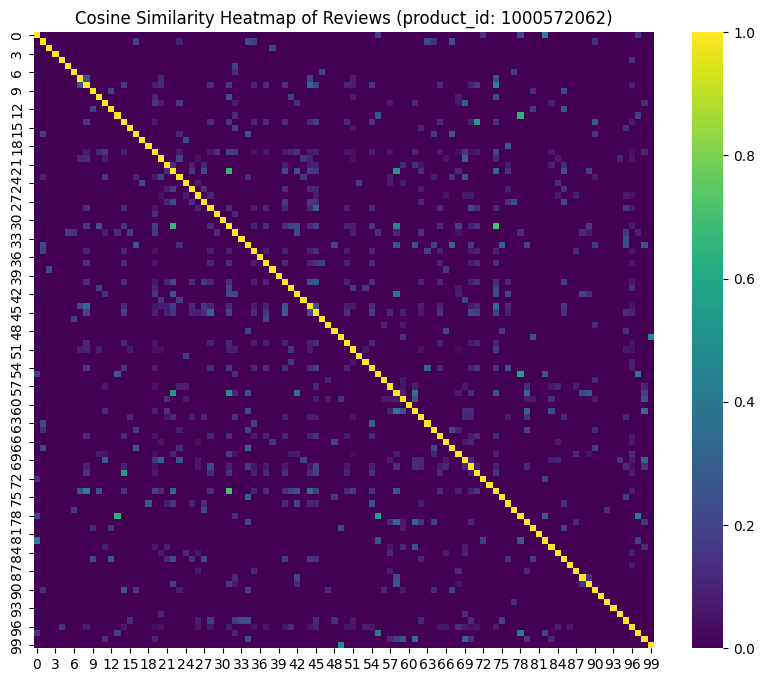

In [10]:
# prompt: df_reviews['product_id']가 1000572062인것 중에서 무작위로  df_reviews['review']를 100개를 골라서 유사도 분석.  heatmap 으로 분석한 문서를 시각화하는 코드 작성. 상위에 작성된 코드와 중복된 코드는 작성하지 않음

import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# 특정 product_id를 가진 리뷰만 선택
selected_reviews = df_reviews[df_reviews['product_id'] == 1000572062]['review']

# 무작위로 100개의 리뷰를 선택 (리뷰 개수가 100개 미만일 경우 전체 리뷰 선택)
num_samples = min(100, len(selected_reviews))
sampled_reviews = random.sample(selected_reviews.tolist(), num_samples)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sampled_reviews)

# 코사인 유사도 계산
cosine_similarities = cosine_similarity(tfidf_matrix)

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarities, cmap='viridis', annot=False)
plt.title('Cosine Similarity Heatmap of Reviews (product_id: 1000572062)')
plt.show()

In [13]:
# prompt: 위에서 구한 유사도를 바탕으로 랜덤하게 10개의 리뷰를 가져와서 각 리뷰와 유사도가 높은 리뷰 30개씩 유사도, product_id 출력

import pandas as pd
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 파일 경로를 지정합니다.
file_path_productInfo = '/content/product_info.csv'
file_path_reviews = '/content/all_reviews1.csv'

try:
    # CSV 파일을 pandas DataFrame으로 읽어옵니다.
    df_productInfo = pd.read_csv(file_path_productInfo)
    df_reviews = pd.read_csv(file_path_reviews)

except Exception as e:
    print(f"An error occurred: {e}")


# 특정 product_id를 가진 리뷰만 선택 (예시: product_id가 1000572062인 리뷰)
selected_reviews = df_reviews[df_reviews['product_id'] == 1000572062]

# 리뷰 텍스트와 product_id를 함께 저장
reviews_with_id = list(zip(selected_reviews['review'], selected_reviews['product_id']))


# 무작위로 10개의 리뷰를 선택 (리뷰 개수가 10개 미만일 경우 전체 리뷰 선택)
num_samples = min(10, len(reviews_with_id))
sampled_reviews_with_id = random.sample(reviews_with_id, num_samples)


# TF-IDF 벡터화 및 코사인 유사도 계산
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([review for review, _ in reviews_with_id])
cosine_similarities = cosine_similarity(tfidf_matrix)

# 유사도가 높은 리뷰 30개 출력
for i, (review, product_id) in enumerate(sampled_reviews_with_id):
    print(f"Review {i+1}: {review} (product_id: {product_id})")
    similar_indices = cosine_similarities[i].argsort()[:-31:-1] # 자기 자신 제외, 상위 30개
    for j in similar_indices[1:]:  # 자기 자신 제외
        similarity = cosine_similarities[i,j]
        similar_review = reviews_with_id[j]

        print(f"  - Similar Review: {similar_review[0]} (product_id: {similar_review[1]}), Similarity: {similarity}")
    print("-" * 50)

Review 1: 착각해서 구매 했지만 아직 시식 전 (product_id: 1000572062)
  - Similar Review: 불고기 전골 편하게 먹을수 있어 좋아요 (product_id: 1000572062), Similarity: 0.22117621753950917
  - Similar Review: 고기를 좋아하는 아들이 먹으라고 샀음 (product_id: 1000572062), Similarity: 0.1355921544326338
  - Similar Review: 불고기 전골 맛있게 먹었습니다!!! (product_id: 1000572062), Similarity: 0.13185670236320207
  - Similar Review: 사리원은 소스가 제 입맛에 맞아서 자주 구매하는데요. 오늘은 사리원 소불고기를 만들어 먹어보았어요. 
먼저 재료를 준비하고 고기는 흐르는물에 씻어서 키친타올로 핏물을 제거하고 약 30분간 소스에 재어두었어요. 밀키트가 냉동식이라 야채랑 버섯이 녹아서 컬리주문시 버섯을 같이 사서 조금더 넣었어요.
고기 재어두는 동안 야채 씻어서 두고 저는 당면을 좋아해서 당연을 좀더 많이 넣었어요.
당면도 소스가 잘 베이게 30분정도 물에 담궈 두었어요. 30분이 지나고 재어두었던 고기와 담궈두었던 당면 그리고 씻어 두었던 야채와 버섯 모두 한꺼번에 넣고 자글자글 끓여줍니다. 전 많이 익혀먹는편이라 어느정도 익으면 약불에서 조금더 끓여 주었어요. 
짜잔~~이렇게 하면 완성!!!
당면을 많이 넣어서 국물이 다 쫄긴 했지만 달콤 짧잘한 불고기가 되어 맛있었어요.
우리 가족 한끼 든든하게 먹었습니당^^♡ (product_id: 1000572062), Similarity: 0.12441512952877805
  - Similar Review: 저녁메뉴로 아이와 함께 먹을수 있는 불고기!! 
푸짐하게 한끼 야채와 버섯 고기 당면이 들어있어 만들기도 편하고 맛도 좋아요 추가로 떡볶이떡 넣어서 아이한테 주니 너무 좋아해요  (product

In [15]:
# prompt: df_reviews['product_id']가 1000572062인것 중에서 무작위로  df_reviews['review']를 1000개를 가져와서 TF-IDF로 5개의 주제로 토픽모델링을 하고 각 토픽별 주요 키워드와 가중치 20개씩 추출

import pandas as pd
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 파일 경로를 지정합니다.
file_path_reviews = '/content/all_reviews1.csv'

try:
    # CSV 파일을 pandas DataFrame으로 읽어옵니다.
    df_reviews = pd.read_csv(file_path_reviews)
except Exception as e:
    print(f"An error occurred: {e}")

# 특정 product_id를 가진 리뷰만 선택하고 무작위로 1000개 샘플링
selected_reviews = df_reviews[df_reviews['product_id'] == 1000572062]['review']
num_samples = min(1000, len(selected_reviews))
sampled_reviews = random.sample(selected_reviews.tolist(), num_samples)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english') # 불용어 제거 추가
tfidf_matrix = vectorizer.fit_transform(sampled_reviews)

# 토픽 모델링 (LDA)
num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tfidf_matrix)

# 각 토픽별 상위 20개 키워드와 가중치 출력
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic {topic_idx + 1}:")
    top_keywords_indices = topic.argsort()[:-21:-1] # 상위 20개 키워드 인덱스
    top_keywords = [(feature_names[i], topic[i]) for i in top_keywords_indices]
    for keyword, weight in top_keywords:
        print(f"  - {keyword}: {weight:.4f}")
    print("-" * 50)

Topic 1:
  - 사리원: 14.5739
  - 소불고기: 14.3245
  - 전골: 12.4858
  - 맛있어요: 11.9215
  - 너무: 8.4103
  - 좋아요: 8.1124
  - 불고기전골: 7.0309
  - 양이: 6.1880
  - 아주: 5.6223
  - 맛있고: 5.5575
  - 불고기: 5.4633
  - 많이: 5.3663
  - 국물이: 5.2864
  - 조금: 5.1965
  - 먹었어요: 4.9468
  - 맛은: 4.8603
  - 생각보다: 4.4149
  - 집에: 4.4080
  - 있어서: 4.2316
  - 잘받았습니다: 4.1799
--------------------------------------------------
Topic 2:
  - 좋아요: 16.4445
  - 맛있네요: 12.3999
  - 한끼: 11.3769
  - 간편하게: 8.7732
  - ㅎㅎ: 8.1802
  - 먹기: 6.5903
  - 추가해서: 6.3130
  - 만족합니다: 6.2543
  - 먹었어요: 5.5589
  - 맛있게: 5.5587
  - 맛있습니다: 5.3254
  - 간편해서: 5.2156
  - 맛있어서: 4.6503
  - 버섯: 4.0392
  - 그냥: 4.0297
  - 반찬으로: 3.8271
  - 구매: 3.8235
  - 먹었네요: 3.7543
  - 식사로: 3.5748
  - 국물까지: 3.5453
--------------------------------------------------
Topic 3:
  - 맛있어요: 35.9329
  - 구매했어요: 11.6847
  - 간편하고: 10.8854
  - 고기가: 6.0779
  - 부드럽고: 5.7626
  - 야채: 5.3765
  - 좋아요: 4.9219
  - 한끼: 4.8395
  - 않고: 4.7276
  - 추가해서: 4.7215
  - 맛잇어요: 4.6921
  - 저렴하게: 4.4338
  - 가끔: 4.0260
 

Cluster 1: Top 20 Keywords
  - 맛있어서: 14.6333
  - 너무: 11.6196
  - 좋아서: 10.1654
  - 후기가: 9.3332
  - 구매했어요: 9.1976
  - ㅎㅎ: 9.1936
  - 괜찮아요: 8.9234
  - 자주: 8.8825
  - 같아요: 8.5265
  - 조금: 7.8355
  - 많이: 7.7001
  - 좋네요: 7.4440
  - 재구매: 7.2509
  - 아직: 6.8802
  - 양이: 6.7750
  - 좋습니다: 6.5973
  - 한끼: 6.5931
  - 세일해서: 6.3278
  - 고기가: 6.3243
  - 맛있습니다: 6.1351
--------------------------------------------------
Cluster 2: Top 20 Keywords
  - 간편하게: 11.0847
  - 불고기: 10.8916
  - 맛있네요: 10.4825
  - 전골: 5.7231
  - 먹었습니다: 2.4428
  - 너무: 2.3834
  - 좋아요: 2.2230
  - 한끼: 2.0994
  - 먹기: 1.9396
  - 맛있게: 1.8487
  - 먹을: 1.5925
  - 한끼먹기: 1.4941
  - 불고기전골: 1.3729
  - 해먹기: 1.2697
  - 좋네요: 1.2671
  - 좋아해서: 1.2267
  - 좋음: 1.1779
  - 조리하기: 1.0727
  - 집에: 1.0531
  - 있어: 1.0352
--------------------------------------------------
Cluster 3: Top 20 Keywords
  - 맛있어요: 42.0836
  - 고기가: 2.8066
  - 부드럽고: 2.6573
  - 간편하고: 2.5521
  - 너무: 2.4546
  - 양도: 2.1372
  - 세일해서: 2.0898
  - 추가해서: 1.9789
  - 적당하고: 1.9368
  - 편하고: 1.8500
  - 달

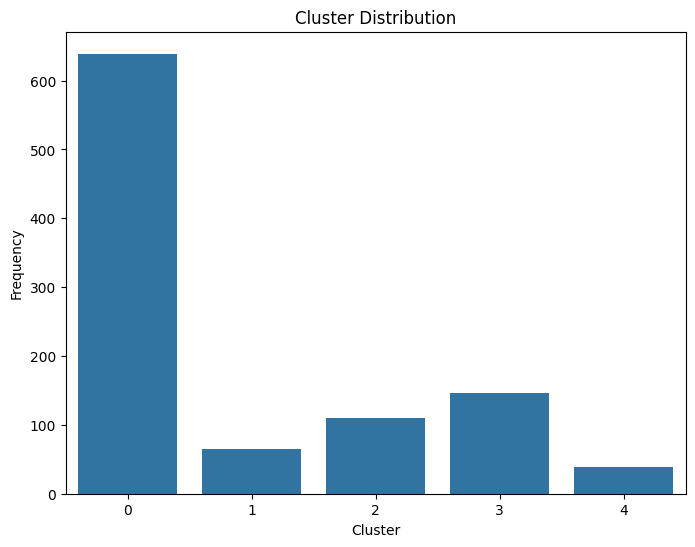

In [17]:
# prompt: df_reviews['product_id']가 1000572062인것 중에서 무작위로  df_reviews['review']를 1000개를 가져와서  5개로 군집화 하고 마지막 컬럼에 군집값을 넣어주고 각 군집별로 상위 키워드 20개와 가중치 출력
# 각 군집별 빈도수 시각화

import pandas as pd
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation

# 파일 경로를 지정합니다.
file_path_reviews = '/content/all_reviews1.csv'

try:
    # CSV 파일을 pandas DataFrame으로 읽어옵니다.
    df_reviews = pd.read_csv(file_path_reviews)
except Exception as e:
    print(f"An error occurred: {e}")

# 특정 product_id를 가진 리뷰만 선택하고 무작위로 1000개 샘플링
selected_reviews = df_reviews[df_reviews['product_id'] == 1000572062]
num_samples = min(1000, len(selected_reviews))
sampled_reviews = selected_reviews.sample(n=num_samples, random_state=42) # random_state for reproducibility


# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(sampled_reviews['review'])

# KMeans 군집화
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
sampled_reviews['cluster'] = kmeans.fit_predict(tfidf_matrix)

# 각 군집별 상위 키워드 20개와 가중치 출력
feature_names = vectorizer.get_feature_names_out()
for cluster_num in range(num_clusters):
    cluster_reviews = sampled_reviews[sampled_reviews['cluster'] == cluster_num]['review']
    cluster_tfidf = vectorizer.transform(cluster_reviews)
    sum_tfidf = cluster_tfidf.sum(axis=0)
    word_scores = [(word, sum_tfidf[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)
    print(f"Cluster {cluster_num + 1}: Top 20 Keywords")
    for word, score in word_scores[:20]:
        print(f"  - {word}: {score:.4f}")
    print("-" * 50)


# 각 군집별 빈도수 시각화
cluster_counts = sampled_reviews['cluster'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()